In [1]:
# Basic data handling and I/O
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
from scipy.io import arff
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

# Model evaluation and splitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings for clean output (optional)
import warnings
warnings.filterwarnings('ignore')

# Set visual aesthetics for plots (optional)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 8)


In [2]:
# Install necessary libraries if needed
#%pip install scipy pandas

# Load ARFF files using scipy
from scipy.io import arff
import pandas as pd

# Load a specific ARFF file (replace with the correct filename as needed)
data_1year, meta_1year = arff.loadarff('/Users/poojithramagiri/Desktop/ML Challenges/polish+companies+bankruptcy+data/1year.arff')
df_1year = pd.DataFrame(data_1year)

# Convert binary classification column to strings for clarity
df_1year['class'] = df_1year['class'].apply(lambda x: x.decode('utf-8'))

# Check the first few rows
print(df_1year.head())


      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  class  
0   82.

In [3]:
df_1year

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,1
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,1
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,1


Accuracy: 0.957325746799431
Precision: 0.43283582089552236
Recall: 0.5686274509803921
F1 Score: 0.4915254237288136

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1355
           1       0.43      0.57      0.49        51

    accuracy                           0.96      1406
   macro avg       0.71      0.77      0.73      1406
weighted avg       0.96      0.96      0.96      1406


Confusion Matrix:
 [[1317   38]
 [  22   29]]
Cross-Validation Scores: [0.96372688 0.95092461 0.97224199 0.95516014 0.96868327]
Mean Cross-Validation Score: 0.9621473805703064
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9670892843020956
Best Model Accuracy: 0.9758179231863442
Best Model Precision: 0.6888888888888889
Best Model Recall: 0.6078431372549019
Best Model F1 Score: 0.6458333333333334

Best Model Classification Report:
        

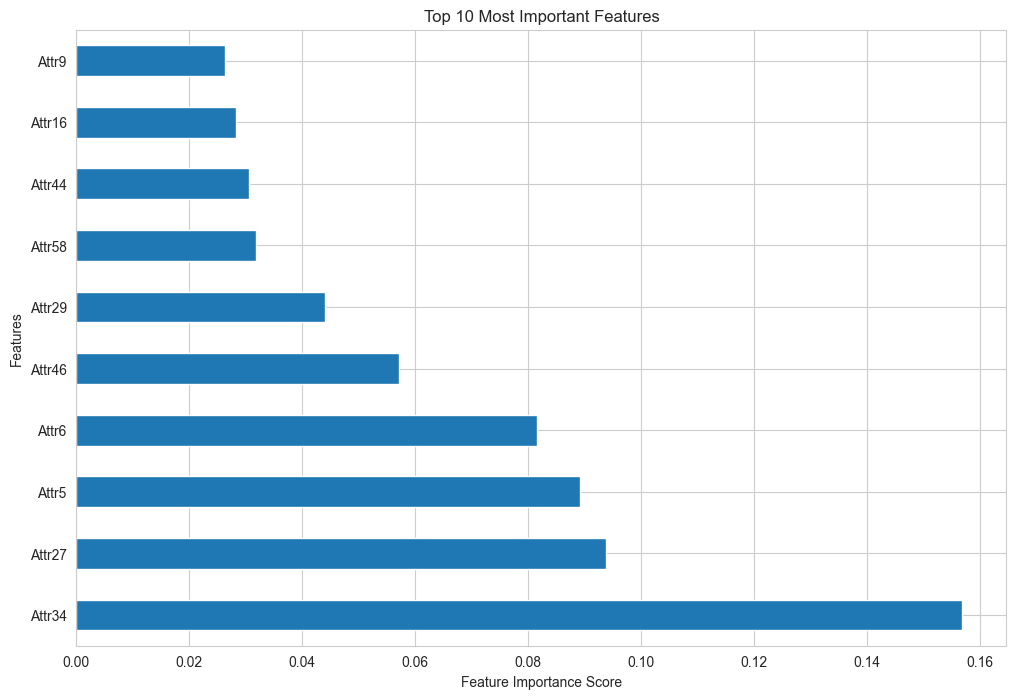

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# Ensure all class labels are bytes, then convert the target variable to integer format
df_1year['class'] = df_1year['class'].apply(lambda x: x.decode() if isinstance(x, bytes) else x).map({'0': 0, '1': 1})

# Check for any NaN values in the 'class' column
if df_1year['class'].isnull().any():
    print("NaN values found in 'class' column after mapping. Check label consistency or adjust the mapping.")

#Separate features and target variable
X = df_1year.drop('class', axis=1)  # Features
y = df_1year['class']                # Target variable

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Handle missing values
imputer = SimpleImputer(strategy='median')  # Use median imputation
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#Train a decision tree classifier
#calculate accuracy, evaluation metrics, cross validation
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

# Evaluate model performance on test set
y_pred = clf.predict(X_test_imputed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_imputed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Train the best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_imputed, y_train)

# Evaluate the best model on the test set
y_best_pred = best_clf.predict(X_test_imputed)
print("Best Model Accuracy:", accuracy_score(y_test, y_best_pred))
print("Best Model Precision:", precision_score(y_test, y_best_pred))
print("Best Model Recall:", recall_score(y_test, y_best_pred))
print("Best Model F1 Score:", f1_score(y_test, y_best_pred))
print("\nBest Model Classification Report:\n", classification_report(y_test, y_best_pred))
print("\nBest Model Confusion Matrix:\n", confusion_matrix(y_test, y_best_pred))


#Plot the feature importances
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


Interpretation of Feature Importance
Dominant Features:
Attr34 and Attr27 are the most important features according to the Decision Tree. This suggests that these features have a significant impact on the model's ability to distinguish between the classes. It might be useful to look into what these attributes represent in your data and why they might be particularly informative for predicting bankruptcy.

Influence on Model:
The prominence of these features in the decision-making process of the tree indicates where splits in the data made the most significant impact on outcome classification. Features with higher importance scores were likely used higher up in the tree, indicating that they were effective in partitioning the data into subsets that are more homogeneous in terms of the target variable.

Decision Boundary Insights:
Because decision trees inherently model non-linear relationships and interactions between features, the importance of these features doesn’t only tell you that they are useful on their own, but also potentially in interaction with other features.